<a href="https://colab.research.google.com/github/ghaitsaanfa/ProjectPredictChurn/blob/main/Project_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CUSTOMER CHURN**

# **Load Data**

In [ ]:
# Mount Google Drive
from google.colab import drive
try:
    drive.mount('/content/drive')
    print("Google Drive berhasil terhubung.")
except Exception as e:
    print(f"Error saat menghubungkan Google Drive: {e}")

Mounted at /content/drive
Google Drive berhasil terhubung.


# **Exploratory Data Anlysis (EDA) Awal**

In [ ]:
# Menampilkan Data Teratas dan Terbawah
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/Project Kelompok 2/Churn.csv'
print(f"\nMencoba memuat dataset dari: {file_path}")
try:
    df = pd.read_csv(file_path)
    print("\nData teratas:")
    print(df.head(7))
    print("")
    print("\nData terbawah:")
    print(df.tail(11))
except FileNotFoundError:
    print(f"\nERROR: File tidak ditemukan. Pastikan path dan nama file sudah benar.")
except Exception as e:
    print(f"Terjadi error: {e}")


Mencoba memuat dataset dari: /content/drive/MyDrive/Colab Notebooks/Project Kelompok 2/Churn.csv

Data teratas:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                N

In [ ]:
# Informasi Umum Data
print("\nInformasi awal dataset: ")
df.info()


Informasi awal dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

In [ ]:
# Statistik Deskriptif
print("\nStatistik deskriptif dataset: ")
print(df.describe())


Statistik deskriptif dataset: 
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [ ]:
# Jumlah Churn
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
# Ukuran Dataset
print(f"Ukuran dataset (baris, kolom): {df.shape}")

Ukuran dataset (baris, kolom): (7043, 21)


In [ ]:
# Nilai Unik
print(f"Nilai-nilai unik di kolom 'PaymentMethod': {df['PaymentMethod'].unique()}")

Nilai-nilai unik di kolom 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
# Identifikasi nilai yang hilang
print("Jumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

Jumlah nilai yang hilang per kolom:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Distribusi Kolom Numerik:


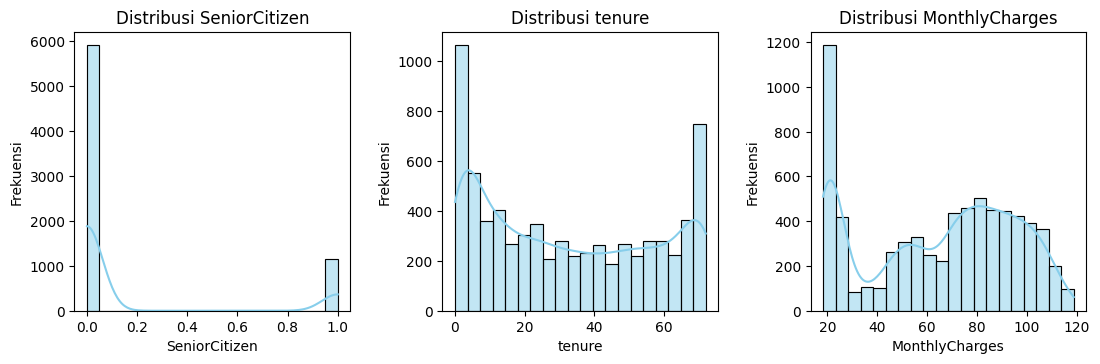


Distribusi Kolom Kategorikal:

Kolom berikut dilewati karena memiliki terlalu banyak nilai unik (>=30):
['customerID', 'TotalCharges']


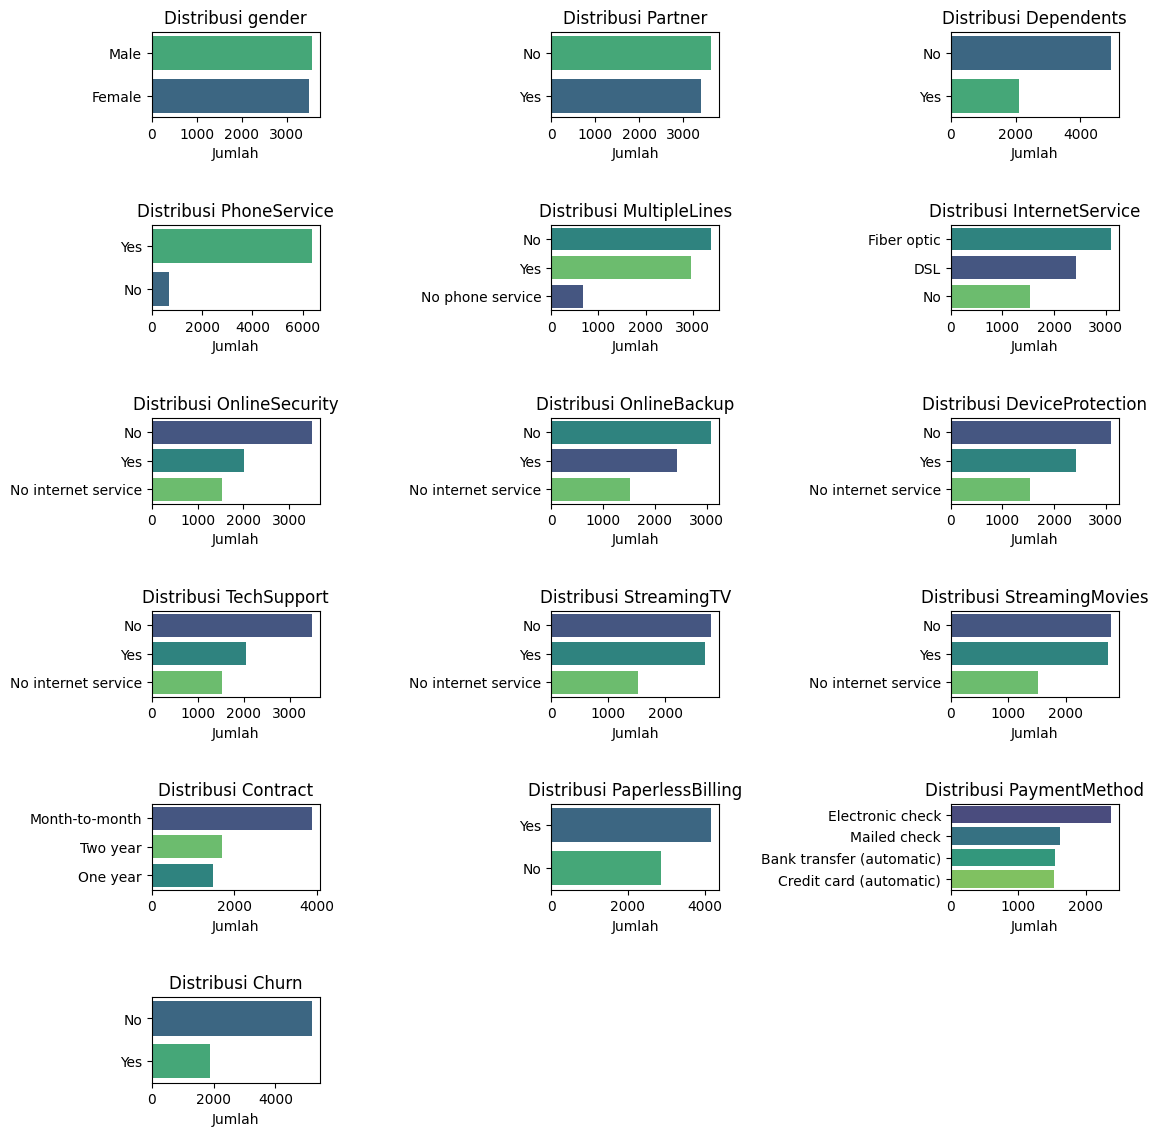

In [ ]:
# Visualisasi distribusi data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Pisahkan kolom numerik dan kategorikal untuk analisis yang lebih mudah
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Distribusi Kolom Numerik
if numerical_cols:
    print("Distribusi Kolom Numerik:")
    # Atur agar maksimal 4 plot per baris
    n_cols_num = 4
    n_rows_num = math.ceil(len(numerical_cols) / n_cols_num)

    plt.figure(figsize=(15, n_rows_num * 4))
    for i, col in enumerate(numerical_cols):
        plt.subplot(n_rows_num, n_cols_num, i + 1)
        sns.histplot(df[col], kde=True, bins=20, color='skyblue')
        plt.title(f'Distribusi {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
    plt.tight_layout(pad=2.0)
    plt.show();
else:
    print("Tidak ada kolom numerik yang ditemukan.")

# Distribusi Kolom Kategorikal
if categorical_cols:
    print("\nDistribusi Kolom Kategorikal:")

    # Saring kolom yang memiliki terlalu banyak nilai unik untuk di-plot
    max_unique_values = 30 # Batas jumlah kategori yang wajar untuk countplot
    cols_to_plot = [col for col in categorical_cols if df[col].nunique() < max_unique_values]
    cols_skipped = [col for col in categorical_cols if df[col].nunique() >= max_unique_values]

    if cols_skipped:
        print(f"\nKolom berikut dilewati karena memiliki terlalu banyak nilai unik (>={max_unique_values}):")
        print(cols_skipped)

    if not cols_to_plot:
        print("\nTidak ada kolom kategorikal yang sesuai untuk di-plot (setelah penyaringan).")
    else:
        # Atur agar maksimal 3 plot per baris untuk keterbacaan
        n_cols_cat = 3
        n_rows_cat = math.ceil(len(cols_to_plot) / n_cols_cat)

        plt.figure(figsize=(12, n_rows_cat * 2))
        for i, col in enumerate(cols_to_plot):
            plt.subplot(n_rows_cat, n_cols_cat, i + 1)
            sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis', hue=col, legend=False)
            plt.title(f'Distribusi {col}', fontsize=12)
            plt.xlabel('Jumlah')
            plt.ylabel('') # Hapus label y karena sudah ada di judul
        plt.tight_layout(pad=3.0)
        plt.show();
else:
    print("\nTidak ada kolom kategorikal yang ditemukan.")

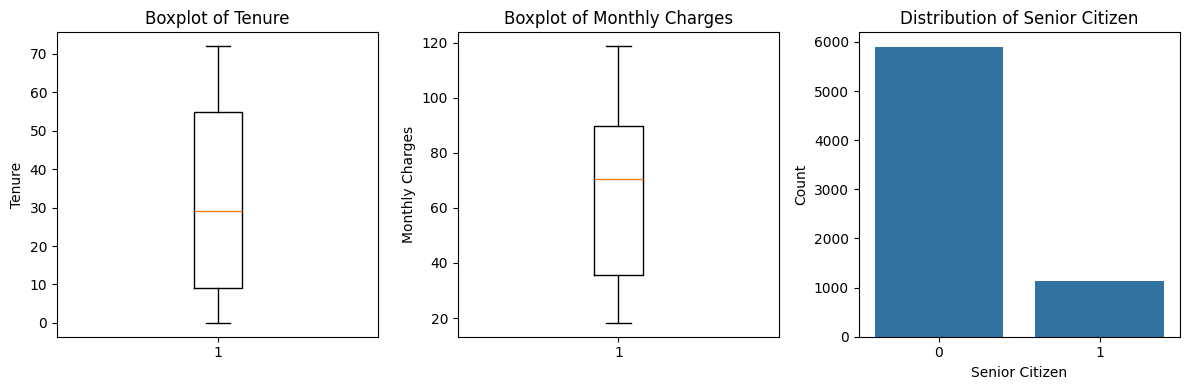

In [ ]:
# Pencilan (Outlier) Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))

# Plot 1: Tenure (Boxplot)
ax1 = plt.subplot(1, 3, 1)
plt.boxplot(df['tenure'])
ax1.set_title('Boxplot of Tenure')
ax1.set_ylabel('Tenure')

# Plot 2: MonthlyCharges (Boxplot)
ax2 = plt.subplot(1, 3, 2)
plt.boxplot(df['MonthlyCharges'])
ax2.set_title('Boxplot of Monthly Charges')
ax2.set_ylabel('Monthly Charges')

# Plot 3: SeniorCitizen (Countplot)
ax3 = plt.subplot(1, 3, 3)
sns.countplot(x='SeniorCitizen', data=df, ax=ax3)
ax3.set_title('Distribution of Senior Citizen')
ax3.set_ylabel('Count') # Label Y lebih cocok 'Count' untuk countplot
ax3.set_xlabel('Senior Citizen')


plt.tight_layout()
plt.show()

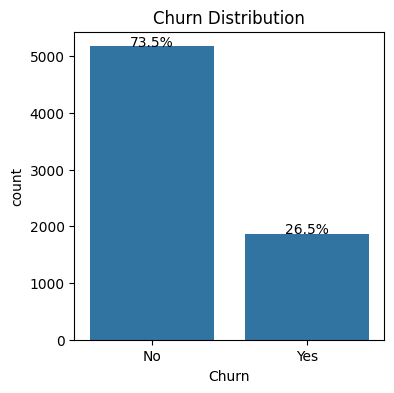

In [ ]:
# Checking Terget Balance
plt.figure(figsize=(4, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')

total = len(df)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, f'{100*height/total:.1f}%', ha="center")

plt.show()

# **Data Preprocessing**

In [ ]:
# Mengidentifikasi nilai non-numerik di kolom TotalCharges
non_numeric_mask = pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()
jumlah_error = non_numeric_mask.sum()
print(f"Ditemukan ada {jumlah_error} baris dengan nilai non-numerik di kolom TotalCharges.")

Ditemukan ada 11 baris dengan nilai non-numerik di kolom TotalCharges.


In [ ]:
# Konversi kolom TotalCharges ke numerik, nilai error jadi NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Tipe data baru dari kolom TotalCharges: {df['TotalCharges'].dtype}")

jumlah_nan = df['TotalCharges'].isnull().sum()
print(f"\nJumlah nilai kosong (NaN) di kolom TotalCharges sekarang: {jumlah_nan}")

print("\nRingkasan DataFrame setelah mengubah nilai error jadi nilai kosong (NaN):")
df.info()

Tipe data baru dari kolom TotalCharges: float64

Jumlah nilai kosong (NaN) di kolom TotalCharges sekarang: 11

Ringkasan DataFrame setelah mengubah nilai error jadi nilai kosong (NaN):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13

In [ ]:
# Ganti NaN dengan rata-rata TotalCharges
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

jumlah_nan_setelah_diisi = df['TotalCharges'].isnull().sum()
print(f"Jumlah nilai kosong (NaN) di 'TotalCharges' setelah diisi: {jumlah_nan_setelah_diisi}")

print("\nRingkasan DataFrame setelah nilai kosong (NaN) terisi:")
df.info()

Jumlah nilai kosong (NaN) di 'TotalCharges' setelah diisi: 0

Ringkasan DataFrame setelah nilai kosong (NaN) terisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7

In [ ]:
# Hapus kolom yang tidak diperlukan if they exist
columns_to_drop = ['customerID','gender','PhoneService']
columns_exist = [col for col in columns_to_drop if col in df.columns]
if columns_exist:
    df.drop(columns_exist, axis=1, inplace=True)

jumlah_kolom_tersisa = len(df.columns)
print(f"Jumlah kolom yang tersisa di DataFrame adalah: {jumlah_kolom_tersisa}")

print("\nDaftar kolom yang tersisa:")
print(*df.columns, sep='\n')

Jumlah kolom yang tersisa di DataFrame adalah: 18

Daftar kolom yang tersisa:
SeniorCitizen
Partner
Dependents
tenure
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [ ]:
# Identifikasi data duplikat
print("Jumlah data duplikat:")
print(df.duplicated().sum())

Jumlah data duplikat:
41


In [ ]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)

print(f"Jumlah data duplikat setelah penghapusan: {df.duplicated().sum()}")

print(f"\nUkuran dataset setelah menghapus duplikat (baris, kolom): {df.shape}")

Jumlah data duplikat setelah penghapusan: 0

Ukuran dataset setelah menghapus duplikat (baris, kolom): (7002, 18)


In [ ]:
# Ubah nilai "No internet service" atau "No phone service dengan No"
kolom_untuk_diubah = ["OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"]

for kolom in kolom_untuk_diubah:
    df[kolom] = df[kolom].replace("No internet service", "No")

df["MultipleLines"] = df["MultipleLines"].replace("No phone service", "No")

print("Proses penggantian nilai selesai.")

Proses penggantian nilai selesai.


In [ ]:
# Encoding kolom kategorikal (object)
# Pemisahan X dan y
X = df.drop('Churn', axis=1)
y = df['Churn']
print("Fitur (X) dan target (y) telah dipisahkan.")

# Encode Fitur Kategorikal (X)
X_encoded = pd.get_dummies(X, drop_first=True)
print(f"\nFitur (X) telah di-encode. Jumlah kolom berubah dari {X.shape[1]} menjadi {X_encoded.shape[1]}.")

# Encode Variabel Target (y)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("\nVariabel target (y) telah di-encode menjadi 0 dan 1.")
print(f"-> Mapping: '{le.classes_[0]}' menjadi 0, '{le.classes_[1]}' menjadi 1")

df_encoded = X_encoded.copy()
df_encoded['Churn'] = y_encoded

Fitur (X) dan target (y) telah dipisahkan.

Fitur (X) telah di-encode. Jumlah kolom berubah dari 17 menjadi 21.

Variabel target (y) telah di-encode menjadi 0 dan 1.
-> Mapping: 'No' menjadi 0, 'Yes' menjadi 1


# **Exploratory Data Analysis (EDA) Lanjutan**

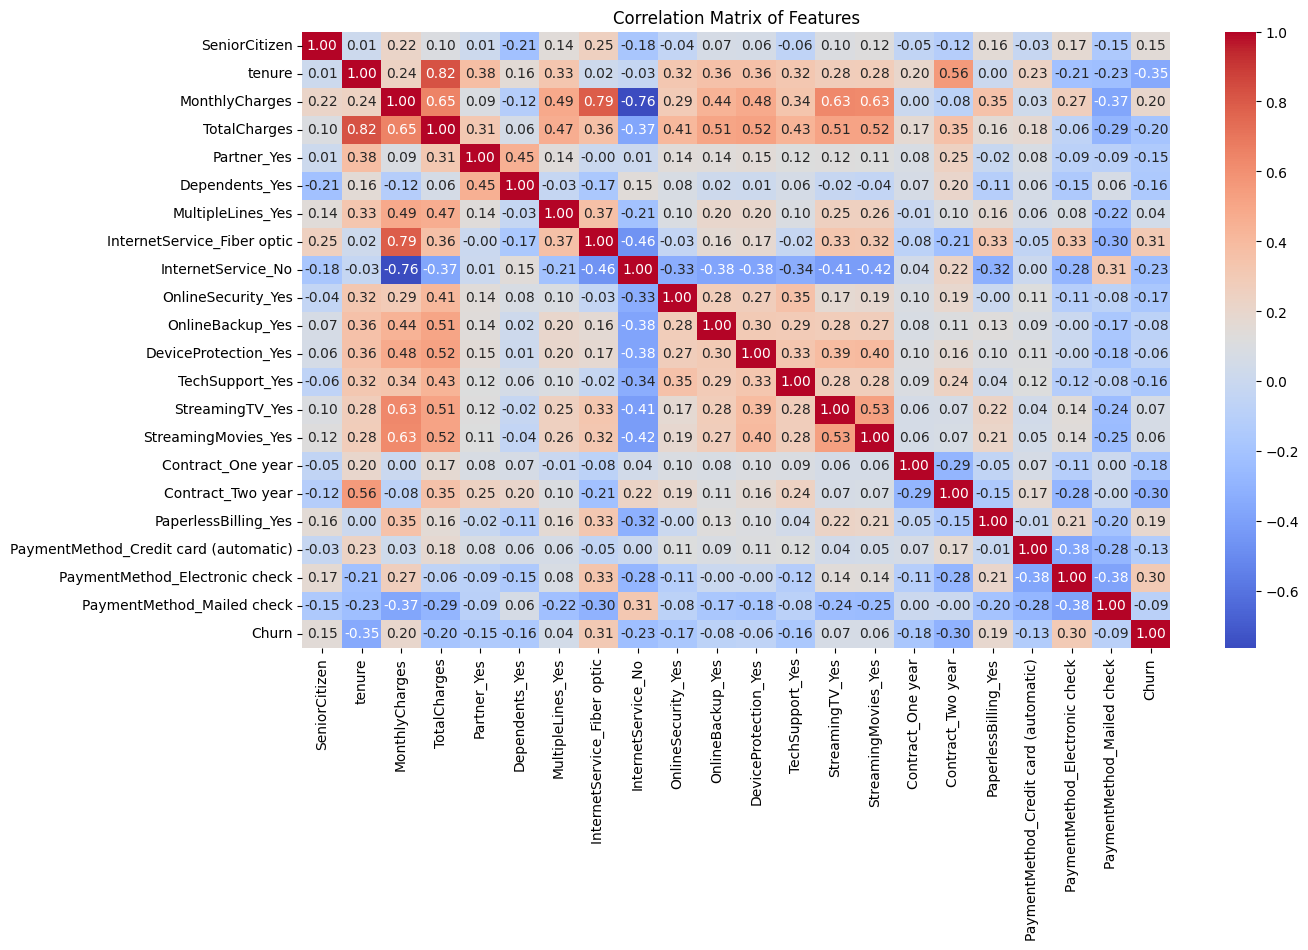

In [ ]:
# Correlation matrix pada data yang sudah di-encode
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
correlation_matrix = df_encoded.corr() # Ganti df_encoded dengan nama DataFrame Anda setelah encoding
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

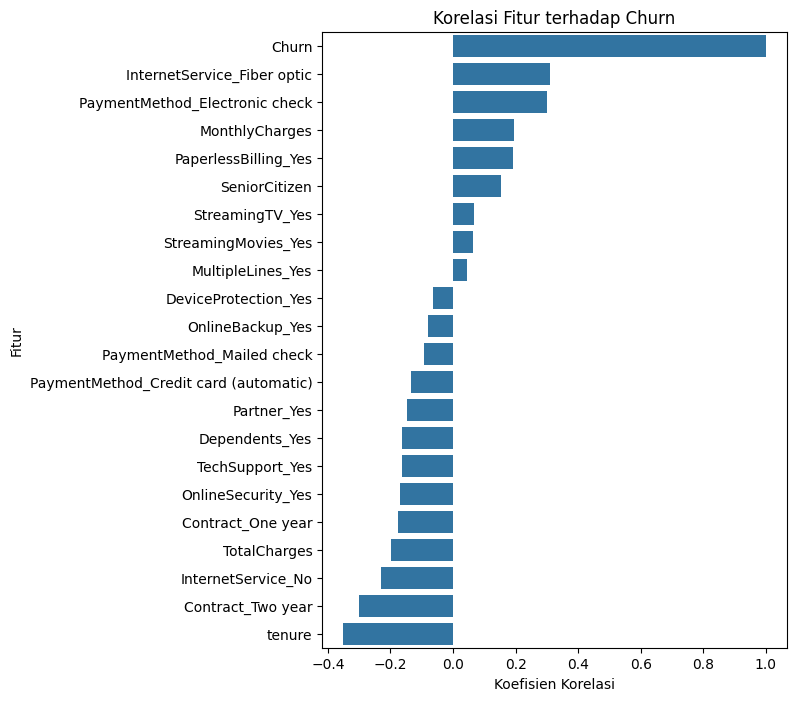

In [ ]:
# Melihat korelasi semua fitur terhadap 'Churn' dan mengurutkannya
plt.figure(figsize=(6, 8))
correlation_target = df_encoded.corr()['Churn'].sort_values(ascending=False)

# Membuat bar plot untuk visualisasi yang lebih mudah dibaca
sns.barplot(x=correlation_target.values, y=correlation_target.index)
plt.title('Korelasi Fitur terhadap Churn')
plt.xlabel('Koefisien Korelasi')
plt.ylabel('Fitur')
plt.show()

# **Model Preparation**

*   **Data Splitting**









In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi set pelatihan (training) dan pengujian (testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
model_columns = list(X_train.columns)

print(f"Ukuran data pelatihan (X_train): {X_train.shape}")
print(f"Ukuran data pengujian (X_test): {X_test.shape}")
print(f"Ukuran label pelatihan (y_train): {y_train.shape}")
print(f"Ukuran label pengujian (y_test): {y_test.shape}")

# Opsional: Periksa distribusi target di set pelatihan dan pengujian
print("\nDistribusi target di data pelatihan:")
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

print("\nDistribusi target di data pengujian:")
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

Ukuran data pelatihan (X_train): (5601, 21)
Ukuran data pengujian (X_test): (1401, 21)
Ukuran label pelatihan (y_train): (5601,)
Ukuran label pengujian (y_test): (1401,)

Distribusi target di data pelatihan:
{np.int64(0): np.int64(4124), np.int64(1): np.int64(1477)}

Distribusi target di data pengujian:
{np.int64(0): np.int64(1031), np.int64(1): np.int64(370)}


*   **Feature Scaling**




In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Ukuran X_train_scaled: {X_train_scaled.shape}")
print(f"Ukuran X_test_scaled: {X_test_scaled.shape}")

Ukuran X_train_scaled: (5601, 21)
Ukuran X_test_scaled: (1401, 21)


# **Penanganan Data Tidak Seimbang**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Ukuran X_train sebelum SMOTE: {X_train_scaled.shape[0]} sampel")
print(f"Ukuran X_train setelah SMOTE (X_resampled): {X_resampled.shape[0]} sampel")

Ukuran X_train sebelum SMOTE: 5601 sampel
Ukuran X_train setelah SMOTE (X_resampled): 8248 sampel


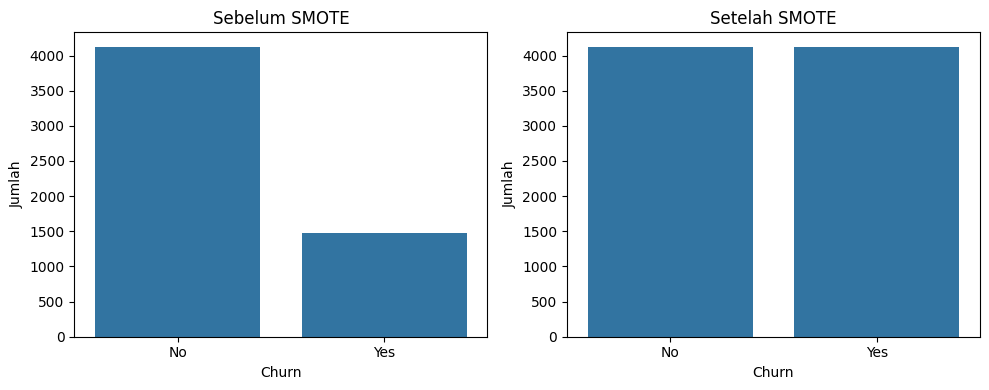

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

churn_labels = le.classes_
y_train_labels = pd.Series(y_train).map({0: churn_labels[0], 1: churn_labels[1]})
y_resampled_labels = pd.Series(y_resampled).map({0: churn_labels[0], 1: churn_labels[1]})

plt.figure(figsize=(10, 4))

# Plot 1: Sebelum SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y_train_labels, order=churn_labels)
plt.title("Sebelum SMOTE")
plt.xlabel("Churn")
plt.ylabel("Jumlah")

# Plot 2: Setelah SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled_labels, order=churn_labels)
plt.title("Setelah SMOTE")
plt.xlabel("Churn")
plt.ylabel("Jumlah")

plt.tight_layout()
plt.show()

# **Modelling**

--- Melatih Model: Logistic Regression ---

Akurasi: 0.7495

Laporan Klasifikasi:
              precision    recall  f1-score   support

          No       0.91      0.73      0.81      1031
         Yes       0.52      0.80      0.63       370

    accuracy                           0.75      1401
   macro avg       0.71      0.77      0.72      1401
weighted avg       0.81      0.75      0.76      1401


Confusion Matrix:


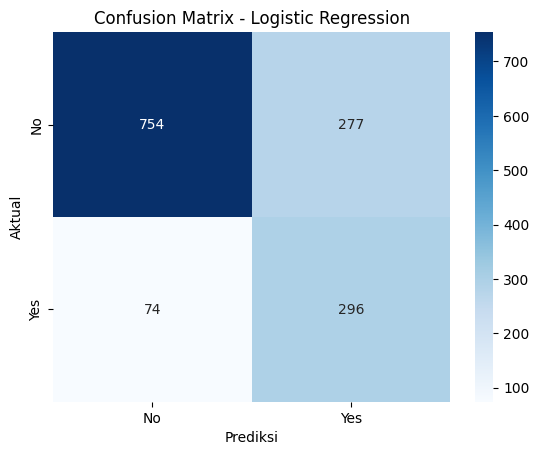

------------------------------------------------------------

--- Melatih Model: Random Forest ---

Akurasi: 0.7802

Laporan Klasifikasi:
              precision    recall  f1-score   support

          No       0.85      0.85      0.85      1031
         Yes       0.58      0.59      0.59       370

    accuracy                           0.78      1401
   macro avg       0.72      0.72      0.72      1401
weighted avg       0.78      0.78      0.78      1401


Confusion Matrix:


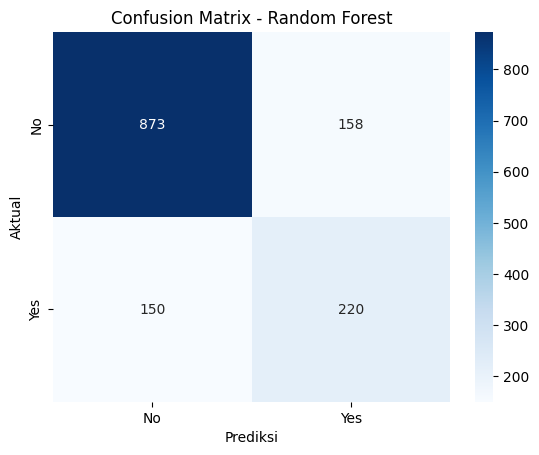

------------------------------------------------------------

--- Melatih Model: Support Vector Machine ---

Akurasi: 0.7545

Laporan Klasifikasi:
              precision    recall  f1-score   support

          No       0.88      0.77      0.82      1031
         Yes       0.53      0.72      0.61       370

    accuracy                           0.75      1401
   macro avg       0.71      0.74      0.71      1401
weighted avg       0.79      0.75      0.76      1401


Confusion Matrix:


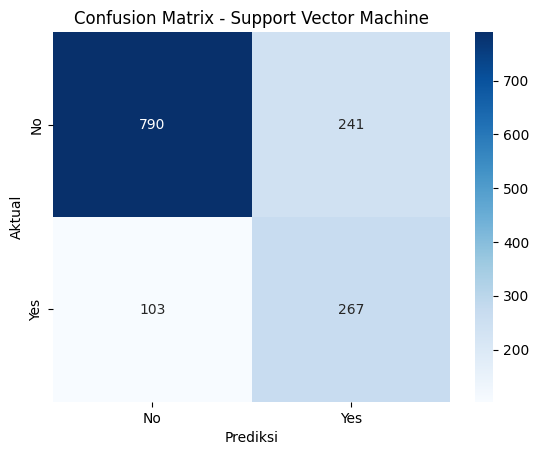

------------------------------------------------------------



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42)
}

# Latih dan evaluasi setiap model
for name, model in models.items():
    print(f"--- Melatih Model: {name} ---")

    # Training model pada data yang sudah di-resample dan di-scaling
    model.fit(X_resampled, y_resampled)

    # Prediksi pada data test yang sudah di-scaling
    y_pred = model.predict(X_test_scaled)

    # Evaluasi
    print(f"\nAkurasi: {accuracy_score(y_test, y_pred):.4f}")
    print("\nLaporan Klasifikasi:")
    # Menggunakan target_names dari LabelEncoder yang sudah kita buat
    print(classification_report(y_test, y_pred, target_names=[le.classes_[0], le.classes_[1]]))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    # Membuat visualisasi confusion matrix yang lebih informatif
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[le.classes_[0], le.classes_[1]], yticklabels=[le.classes_[0], le.classes_[1]])
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    print("-" * 60 + "\n")

In [ ]:
!pip install xgboost

Melatih model XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:52:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pelatihan selesai.

--- Hasil Evaluasi Model XGBoost ---
Akurasi: 0.8009

--- Hasil Laporan Klasifikasi XGBoost ---
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1031
           1       0.61      0.68      0.64       370

    accuracy                           0.80      1401
   macro avg       0.75      0.76      0.75      1401
weighted avg       0.81      0.80      0.80      1401


Confusion Matrix:


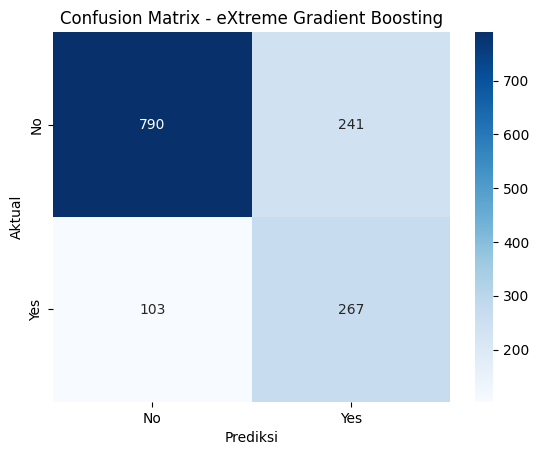

------------------------------------------------------------



In [ ]:
# Import library xgboost
import xgboost as xgb
from sklearn.metrics import classification_report

# --- KODE UNTUK MODEL XGBOOST ---

# 1. Inisialisasi model XGBoost dengan beberapa parameter awal yang baik
# 'use_label_encoder=False' dan 'eval_metric='logloss'' penting untuk versi baru
model_xgb = xgb.XGBClassifier(
    n_estimators=100,          # Jumlah pohon
    learning_rate=0.1,         # Seberapa cepat model belajar
    max_depth=5,               # Kedalaman maksimum pohon
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 2. Latih model dengan data yang SAMA PERSIS seperti sebelumnya (hasil SMOTE)
print("Melatih model XGBoost...")
model_xgb.fit(X_resampled, y_resampled)
print("Pelatihan selesai.")

# 3. Buat prediksi pada data tes yang sama
predictions_xgb = model_xgb.predict(X_test_scaled)

# 4. Tampilkan hasilnya
print("\n--- Hasil Evaluasi Model XGBoost ---")
print(f"Akurasi: {accuracy_score(y_test, predictions_xgb):.4f}")

print("\n--- Hasil Laporan Klasifikasi XGBoost ---")
print(classification_report(y_test, predictions_xgb))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
# 5. Membuat visualisasi confusion matrix yang lebih informatif
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[le.classes_[0], le.classes_[1]], yticklabels=[le.classes_[0], le.classes_[1]])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title(f'Confusion Matrix - eXtreme Gradient Boosting')
plt.show()
print("-" * 60 + "\n")

# **Save Model**

In [ ]:
# prompt: create a code to save the model XGBoost and RandomForest

import joblib
import os

# Tentukan path untuk menyimpan model di Google Drive
save_path_drive = '/content/drive/MyDrive/Colab Notebooks/Project Kelompok 2/Saved Models/'

# Buat direktori jika belum ada
os.makedirs(save_path_drive, exist_ok=True)

# --- Menyimpan Model XGBoost ---
xgb_model_filename = os.path.join(save_path_drive, 'xgboost_churn_model.pkl')
try:
    joblib.dump(model_xgb, xgb_model_filename)
    print(f"Model XGBoost berhasil disimpan di: {xgb_model_filename}")
except Exception as e:
    print(f"Error saat menyimpan model XGBoost: {e}")

# --- Menyimpan Model Logistic Regression ---
model_logreg = models.get("Logistic Regression")
if model_logreg:
   logreg_model_filename = os.path.join(save_path_drive, 'logistic_regression_churn_model.pkl')
   try:
       joblib.dump(model_logreg, logreg_model_filename)
       print(f"Model Logistic Regression berhasil disimpan di: {logreg_model_filename}")
   except Exception as e:
       print(f"Error saat menyimpan model Logistic Regression: {e}")
else:
    print("Model 'Logistic Regression' tidak ditemukan dalam dictionary 'models'.")

# --- Menyimpan Model Random Forest ---
model_rf = models.get("Random Forest")
if model_rf:
   rf_model_filename = os.path.join(save_path_drive, 'random_forest_churn_model.pkl')
   try:
       joblib.dump(model_rf, rf_model_filename)
       print(f"Model Random Forest berhasil disimpan di: {rf_model_filename}")
   except Exception as e:
       print(f"Error saat menyimpan model Random Forest: {e}")
else:
    print("Model 'Random Forest' tidak ditemukan dalam dictionary 'models'.")

# --- Menyimpan Model Support Vector Machine ---
model_svm = models.get("Support Vector Machine")
if model_svm:
   svm_model_filename = os.path.join(save_path_drive, 'support_vector_machine_churn_model.pkl')
   try:
       joblib.dump(model_svm, svm_model_filename)
       print(f"Model Support Vector Machine berhasil disimpan di: {svm_model_filename}")
   except Exception as e:
       print(f"Error saat menyimpan model Support Vector Machine: {e}")
else:
    print("Model 'Support Vector Machine' tidak ditemukan dalam dictionary 'models'.")

# Opsional: Menyimpan Scaler dan DaftarKolom juga penting untuk deployment
scaler_filename = os.path.join(save_path_drive, 'scaler.pkl')
try:
    joblib.dump(scaler, scaler_filename)
    print(f"Scaler berhasil disimpan di: {scaler_filename}")
except Exception as e:
    print(f"Error saat menyimpan Scaler: {e}")

model_columns_filename = os.path.join(save_path_drive, 'model_columns.pkl')
try:
    joblib.dump(model_columns, model_columns_filename)
    print(f"Daftar kolom model berhasil disimpan di: {model_columns_filename}")
except Exception as e:
    print(f"Error saat menyimpan daftar kolom model: {e}")

print("\nProses penyimpanan model dan preprocessor selesai.")


Model XGBoost berhasil disimpan di: /content/drive/MyDrive/Colab Notebooks/Project Kelompok 2/Saved Models/xgboost_churn_model.pkl
Model Logistic Regression berhasil disimpan di: /content/drive/MyDrive/Colab Notebooks/Project Kelompok 2/Saved Models/logistic_regression_churn_model.pkl
Model Random Forest berhasil disimpan di: /content/drive/MyDrive/Colab Notebooks/Project Kelompok 2/Saved Models/random_forest_churn_model.pkl
Model Support Vector Machine berhasil disimpan di: /content/drive/MyDrive/Colab Notebooks/Project Kelompok 2/Saved Models/support_vector_machine_churn_model.pkl
Scaler berhasil disimpan di: /content/drive/MyDrive/Colab Notebooks/Project Kelompok 2/Saved Models/scaler.pkl
Daftar kolom model berhasil disimpan di: /content/drive/MyDrive/Colab Notebooks/Project Kelompok 2/Saved Models/model_columns.pkl

Proses penyimpanan model dan preprocessor selesai.
